# WORLD HAPPINES REPORT ANALYSIS

World Happiness Report, an annual report created by the UN Sustainable Development Solutions Network with the which assigns each country a happiness score based on the answers to a poll question that asks respondents to rank their life on a scale of 0 - 10.

It also includes estimates of factors that may contribute to each country's happiness, including economic production, social support, life expectancy, freedom, absence of corruption, and generosity, to provide context for the score. Although these factors aren't actually used in the calculation of the happiness score, they can help illustrate why a country received a certain score.

Below are descriptions for some of the columns we'll be working with:

- Country - Name of the country.
- Region - Name of the region the country belongs to.
- Happiness Rank - The rank of the country, as determined by its happiness score.
- Happiness Score - A score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10.
- Family - The estimated extent to which family contributes to the happiness score.
- Freedom - The estimated extent to which freedom contributes to the happiness score.
- Generosity - The estimated extent to which generosity contributes to the happiness score.

This analysis aims to answer the following questions:

- How can aggregating the data give us more insight into happiness scores?
- How did world happiness change from 2015 to 2017?
- Which factors contribute the most to the happiness score?

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
first_5 = happiness2015.head(5) # first five rows
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [183]:
# display of mean for each column across regions

mean_happiness={}
mean_econ ={}
mean_lifexp={}
mean_trust={}
mean_freedom={}
mean_generosity={}
mean_family={}
mean_dystopia={}

regions = happiness2015['Region'].unique()
for i in regions:
    # splitting data frame into groups
    region_group = happiness2015[happiness2015['Region']==i]
    # applying a function to each group
    region_mean = region_group['Happiness Score'].mean()
    region_econ_mean = region_group['Economy (GDP per Capita)'].mean()
    region_life_expectancy_mean = region_group['Health (Life Expectancy)'].mean()
    region_freedom_mean = region_group['Freedom'].mean()
    region_trust_mean = region_group['Trust (Government Corruption)'].mean()
    region_generosity = region_group['Generosity'].mean()
    region_family = region_group['Family'].mean()
    region_Dystopia = region_group['Dystopia Residual'].mean()
    # combine results in data structure
    mean_happiness[i] = region_mean
    mean_econ[i] = region_econ_mean
    mean_lifexp[i] = region_life_expectancy_mean
    mean_freedom[i] = region_freedom_mean
    mean_generosity[i]= region_generosity
    mean_family[i] = region_family
    mean_dystopia[i] = region_Dystopia
    mean_trust[i]= region_trust_mean

## Analysis of regional averages for every indicator influencing overall happiness score

Text(0.5, 1.0, 'Average Happiness Score per Region')

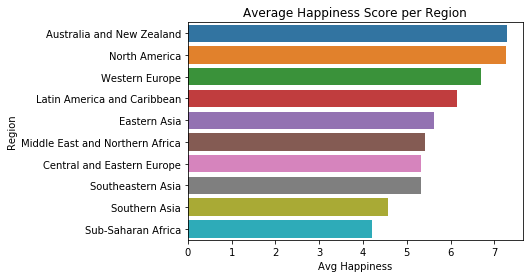

In [181]:
# convertion of dictionary to dataframe
from pandas import DataFrame
happinessmean = DataFrame(list(mean_happiness.items()), columns = ['Region', 'Avg Happiness']).sort_values('Avg Happiness', ascending=False)
avghappiness = sns.barplot(y='Region', x='Avg Happiness', data=happinessmean)
plt.title('Average Happiness Score per Region')

# happinessmean.plot(x='Region', y='Happiness', kind='barh', title='Average Happiness Score Per Region', xlim=(0,10))

Austarlia & New Zealand, and North America are the regions with the highest average happiness scores while Sub-saharan Africa and Southern Asia are the regions with the lowest average happiness scores. 

Text(0.5, 1.0, 'Average GDP per Region')

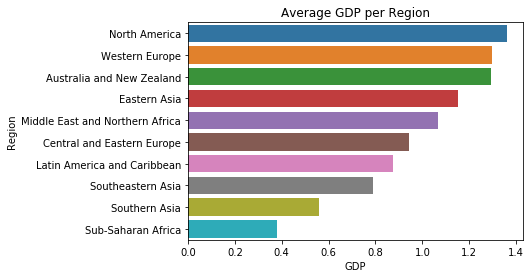

In [180]:
GDPmean = DataFrame(list(mean_econ.items()), columns = ['Region', 'GDP']).sort_values('GDP', ascending=False)
# GDPmean.plot(x='Region', y='GDP', kind='barh', title='Average GDP per Region', xlim=(0, 2))
GDPavg = sns.barplot(y='Region', x='GDP', data=GDPmean)
plt.title('Average GDP per Region')

The regions with the highest GDP are North America, Western Europe and Australia and New Zealand all ranging netween 1.2 - 1.3. The regions with the lowest average GDP levels are Sub- Saharan Africa, Southern Asia with an average GDP score lower than 0.6

Text(0.5, 1.0, 'Average Life Expectancy Per Region')

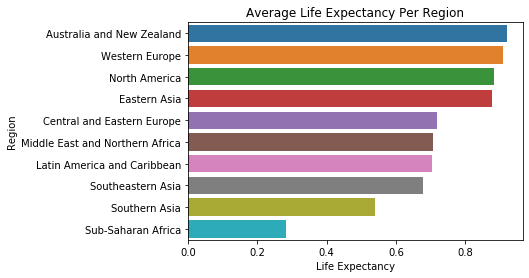

In [215]:
LifeExp = DataFrame(list(mean_lifexp.items()), columns = ['Region', 'Life Expectancy']).sort_values('Life Expectancy', ascending=False)
# LifeExp.plot(x='Region', y='Life Expectancy', kind='barh', title='Average Life Expectancy per Region', xlim=(0, 1))

LifeExpec = sns.barplot(data = LifeExp, x='Life Expectancy', y= 'Region')
plt.title('Average Life Expectancy Per Region')

The regions with the highest Life Expectancy are Australia and New Zealand, Western Europe North America, and East Asia all ranging netween 0.7 - 0.9. The regions with the lowest average Life Expectancy levels are Sub- Saharan Africa (0.28), Southern Asia (0.55), all with an average GDP score lower than 0.6.

Text(0.5, 1.0, 'Average Freedom Scores')

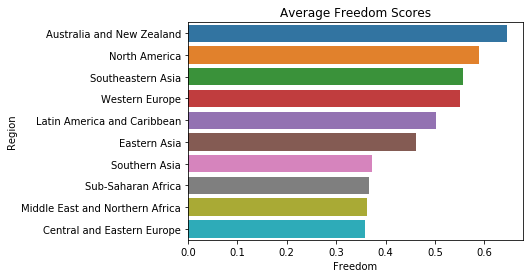

In [185]:
Freedom = DataFrame(list(mean_freedom.items()), columns = ['Region', 'Freedom']).sort_values('Freedom',ascending=False)
Freedom = sns.barplot(data=Freedom, x='Freedom', y='Region')
plt.title('Average Freedom Scores')

The regions where citizens have the highest levels of freedom are Australia and New Zealand, North America, Southeastern Asia and Western Europe all ranging netween 0.55 - 0.65. 

The regions with the lowest levels of freedom are Central and Eastern Europe and Middle East and Northern Africa, Sub-Saharan Africa and Southern Asia, all with scores between 0.35 -0.37.

Text(0.5, 1.0, 'Average Trust Levels in Government')

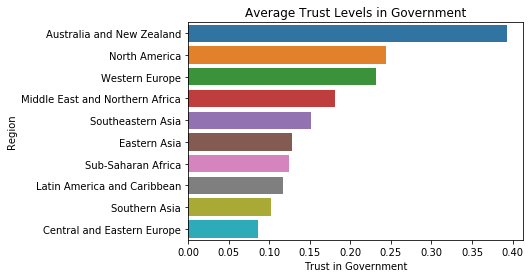

In [187]:
Trust = DataFrame(list(mean_trust.items()), columns = ['Region', 'Trust in Government']).sort_values('Trust in Government',ascending=False)
Trust = sns.barplot(data=Trust, x='Trust in Government', y='Region')
plt.title('Average Trust Levels in Government')

The regions characterised with the lowest corruption levels and where citizens have the highest trust levels in government and with the least government corruption are Australia and New Zealand, North America,and Western Europe. 

The regions with the lowest trust in government and the highest corruption levels are  Central and Eastern Europe, Southern Asia and Latin America & Carribean.

In [177]:
# Confirm unique regions
happiness2015['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [168]:
# Number of Countries in Regions
happiness2015['Region'].value_counts()


Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

Subsaharan Africa has the highest number of countries (40) and Australia and New zealand having the least (2)

In [170]:
# Group Data By Regions
grouped = happiness2015.groupby('Region')

## South East Asia - Analysis of Happiness & Influencing Varibles

Text(0.5, 1.0, 'South East Asia Happiness Scores')

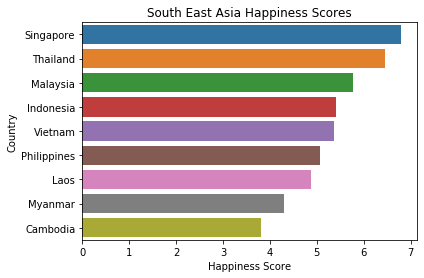

In [171]:
# Get South Eastern Asian Group
South_east_asia =grouped.get_group('Southeastern Asia') 
# Happiness Score
South_east_asia = happiness2015[happiness2015['Region'] == 'Southeastern Asia']
# South_east_asia.plot(x='Country', y='Happiness Score', kind='barh', title='South Eastern Asia Happiness Score', xlim=(0, 10))
SEA = sns.barplot(x='Happiness Score', y='Country', data=South_east_asia)
plt.title('South East Asia Happiness Scores')

### Scatter Plot Correlation of Happiness Scores and Influencing Variables

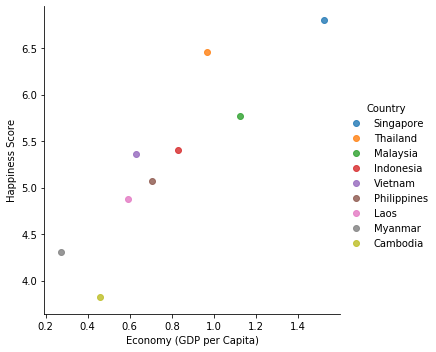

In [242]:
# GDP Relative to Happiness Score
SEA_econ = sns.lmplot(data = South_east_asia, x='Economy (GDP per Capita)', y='Happiness Score', fit_reg=False, hue ='Country', height = 5)

An analysis of GDP relative to Happiness score shows that GDP and Happiness Score are positively correlated. The general trend is that the higher the GDP levels a country has the higher the happiness score. 

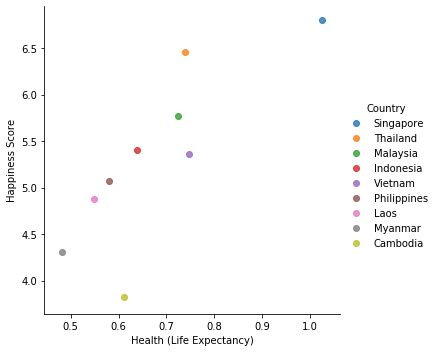

In [243]:
# Life Expectancy Relative to Happiness Score
SEA_health = sns.lmplot(data = South_east_asia, x='Health (Life Expectancy)', y='Happiness Score', fit_reg=False, hue ='Country', height = 5)

An analysis of Health and Life Expectancy levels relative to Happiness score shows that generally, aside from afew outliers, Life Expectancy and Happiness Score are positively correlated. The general trend is that the higher the Health and Life Expectancy levels a country has the higher the happiness score.

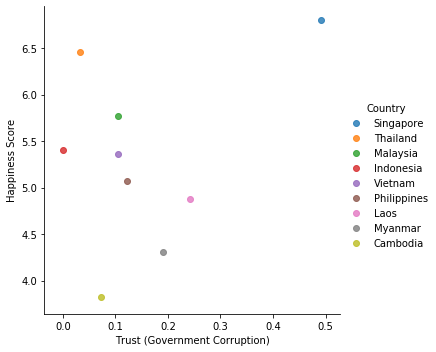

In [244]:
# Trust and Governemtn Corruption Levels Relative to Happiness Scores
SEA_trust = sns.lmplot(data = South_east_asia, x='Trust (Government Corruption)', y='Happiness Score', fit_reg=False, hue ='Country', height = 5)

An analysis of Trust in Government relative to happiness doesn't show a direct correlation between Government corruption levels and happiness scores.

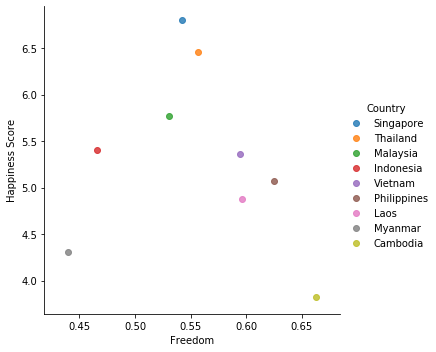

In [245]:
# Freedom Relative to Happiness Score
SEA_freedom = sns.lmplot(data = South_east_asia, y='Happiness Score', x='Freedom', fit_reg=False, hue ='Country', height = 5)

From the analysis of Freedom and Happiness Scores, no direct correlation is evident between happiness scores and Freedom scores.

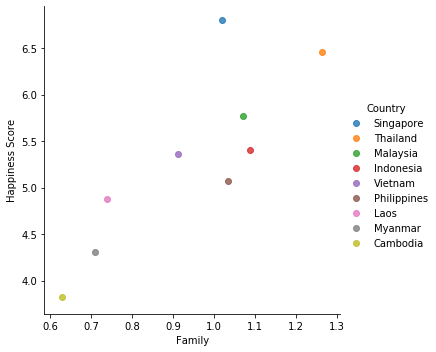

In [246]:
# Family index relative to Happiness Score
SEA_family = sns.lmplot(data = South_east_asia, y='Happiness Score', x='Family', fit_reg=False, hue ='Country', height = 5)

From the analysis the data illustrates that there is a direct correlation between a country in south east asia having a higher family index to having a higher happiness score amongst ts citizens.

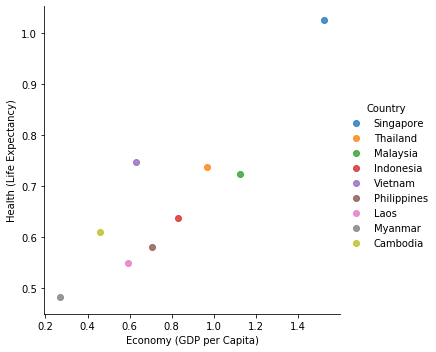

In [248]:
# GDP per Capita/ Economic Levels Relative to Happiness
SEA_life_gdp = sns.lmplot(data = South_east_asia, y='Health (Life Expectancy)', x='Economy (GDP per Capita)', fit_reg=False, hue='Country',height=5)

An analysis of the GDP per Capita to Health and Life expectancy levels shows that amongst countries in South East Asia, the Life expectancy and Quality of Health increases as GDP per capita increases showing a positive correlation between GDP per Capita and Life Expectancy.

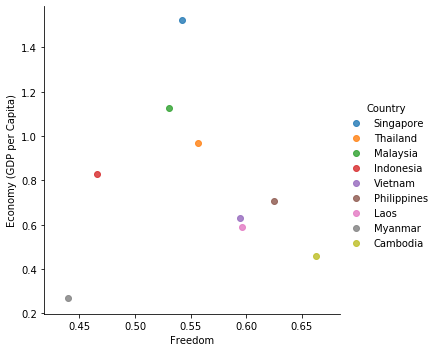

In [249]:
# Freedom relative to GDP
SEA_freedom_gdp = sns.lmplot(data = South_east_asia, y='Economy (GDP per Capita)', x='Freedom', fit_reg=False, hue='Country', height=5)

An analysis of freedom relative to GDP per capita among south east asian countries reveals no direct correlation between the two. Several countries have higher freedom scores but low GDP per Capita levels.

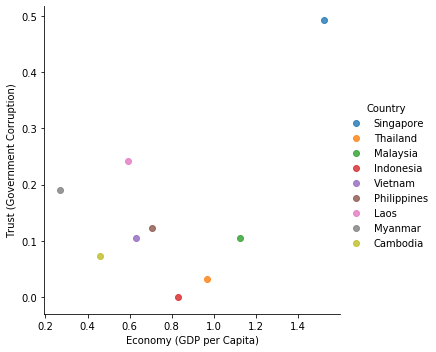

In [250]:
# GDP Per CApita Relative to Trust and Government Corruption
SEA_freedom_gdp = sns.lmplot(data = South_east_asia, x='Economy (GDP per Capita)', y='Trust (Government Corruption)', fit_reg=False, hue='Country', height=5)

An analysis of the data set shows that there is no correlation between GDP per capita and Government Corruption Levels

### Pearson Correlation of Happiness Scores and Influencing Variables

In [210]:
sea_countries = pd.DataFrame(South_east_asia, columns=['Happiness Score','Economy (GDP per Capita)', 'Family', 'Freedom', 'Trust (Government Corruption)', 'Generosity'])
print(sea_countries)

     Happiness Score  Economy (GDP per Capita)   Family  Freedom  \
23             6.798                   1.52186  1.02000  0.54252   
33             6.455                   0.96690  1.26504  0.55664   
60             5.770                   1.12486  1.07023  0.53024   
73             5.399                   0.82827  1.08708  0.46611   
74             5.360                   0.63216  0.91226  0.59444   
89             5.073                   0.70532  1.03516  0.62545   
98             4.876                   0.59066  0.73803  0.59591   
128            4.307                   0.27108  0.70905  0.44017   
144            3.819                   0.46038  0.62736  0.66246   

     Trust (Government Corruption)  Generosity  
23                         0.49210     0.31105  
33                         0.03187     0.57630  
60                         0.10501     0.33075  
73                         0.00000     0.51535  
74                         0.10441     0.16860  
89                       

In [238]:
# Calculation of correlation coefficient usin Pearson method
seacorr = sea_countries.corr(method='pearson')
print(seacorr)

                               Happiness Score  Economy (GDP per Capita)  \
Happiness Score                       1.000000                  0.896032   
Economy (GDP per Capita)              0.896032                  1.000000   
Family                                0.831151                  0.673107   
Freedom                              -0.207494                 -0.077044   
Trust (Government Corruption)         0.337479                  0.460157   
Generosity                           -0.237078                 -0.376187   

                                 Family   Freedom  \
Happiness Score                0.831151 -0.207494   
Economy (GDP per Capita)       0.673107 -0.077044   
Family                         1.000000 -0.219007   
Freedom                       -0.219007  1.000000   
Trust (Government Corruption) -0.177597 -0.034461   
Generosity                    -0.147119 -0.653547   

                               Trust (Government Corruption)  Generosity  
Happiness Score     

Text(0.5, 1, 'Correlation Between Variables Influencing Happiness in South East Asia')

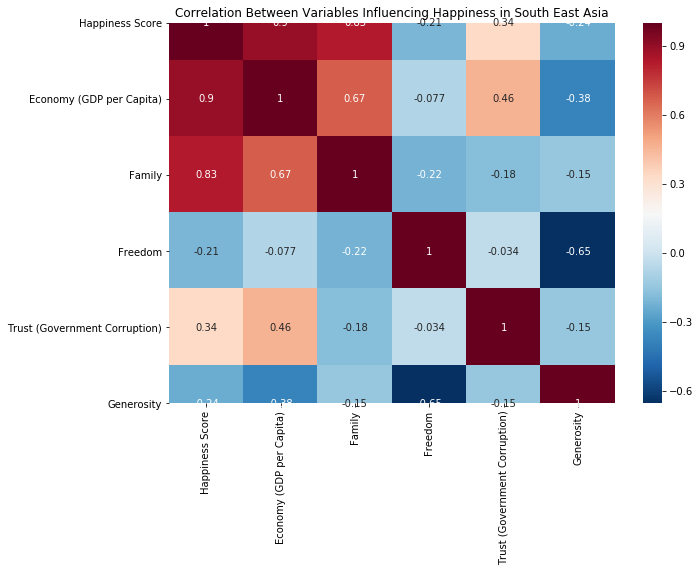

In [239]:
# Correlation coefficient between variables influencing Happiness Scores in South East Asia
plt.subplots(figsize=(10, 7))
sns.heatmap(seacorr,xticklabels=sea_countries.columns,yticklabels=sea_countries.columns, cmap='RdBu_r',annot=True,linewidth=0)
plt.title('Correlation Between Variables Influencing Happiness in South East Asia')

The heatmap is an illustration of correlations between variables affecting the overall happiness score in south easter asia. The heatmap illustrates a positive correlation between GDP per capita and Happiness Score, Family and Happiness Score, Trust/Government Corruption levels and Happiness Score and Generosity and happiness Scores.

The heatmap also iluustrates a negative correlation between freedom and Happiness Scores.

## Sub Saharan Africa - Analysis of Happiness Scores & Influencing Variables

Text(0.5, 1.0, 'Sub Saharan Africa Happiness Scores')

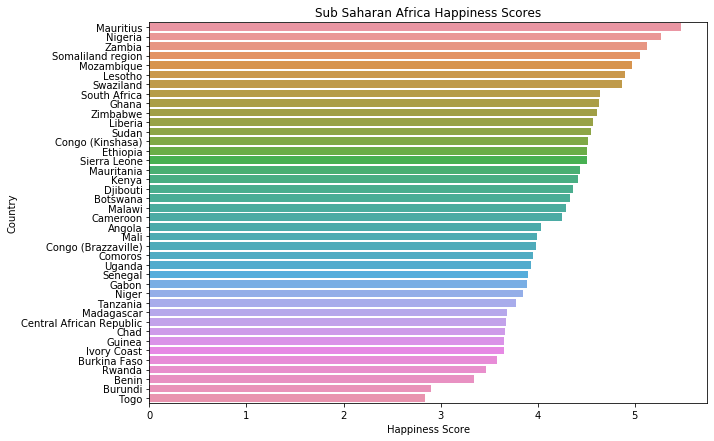

In [257]:
ssafrica = grouped.get_group('Sub-Saharan Africa')
plt.subplots(figsize=(10,7))
SsA = sns.barplot(x='Happiness Score', y='Country', data=ssafrica)
plt.title('Sub Saharan Africa Happiness Scores')

The happiness scores in Sub Saharan Africa range from 2.8 to 5.5 with Mauritius having the highest happiness score followed by: Nigeira, Zambia, Somaliland Region,and Mozambique, all with a happiness score above 5. The countries with the lowest happiness scores are Togo and Burundi with scores below 3.

Text(0.5, 1, 'Happiness Relative to GDP')

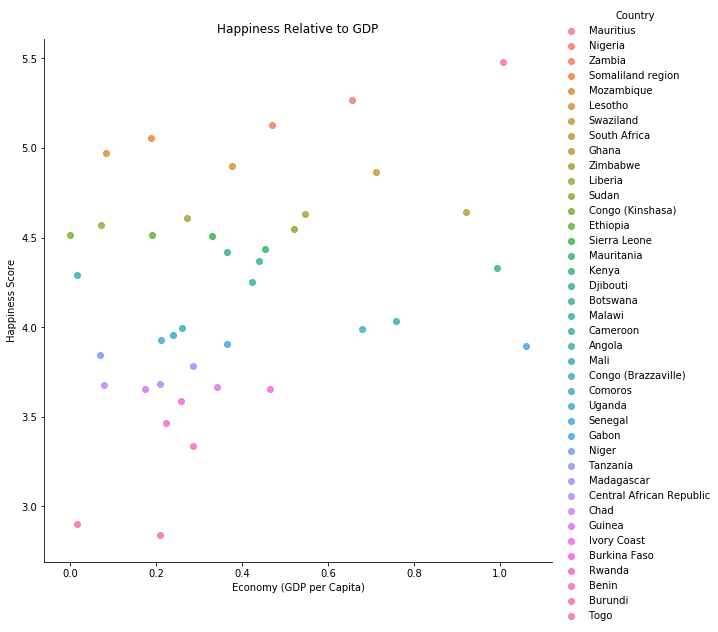

In [264]:
SSA_GDP = sns.lmplot(data=ssafrica, x='Economy (GDP per Capita)', y='Happiness Score', fit_reg=False, hue='Country', size=8)
plt.title('Happiness Relative to GDP')

Amongst the countries in Sub Saharan Africa, there is zero correlation between GDP and Happiness levels among the citizens of African countries.

Text(0.5, 1, 'Happiness Relative to Life Expectancy')

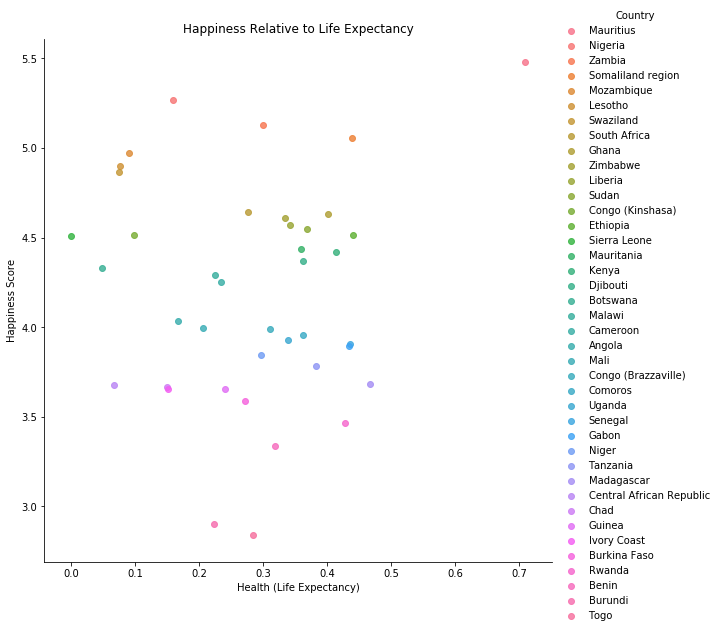

In [266]:
SSA_Life = sns.lmplot(data=ssafrica, x='Health (Life Expectancy)', y='Happiness Score', fit_reg=False, hue='Country', size=8)
plt.title('Happiness Relative to Life Expectancy')

From the analysis, there is zero correlation between Health/ LIfe expectancy levels and Happiness among countries in Sub Saharan Africa.

Text(0.5, 1, 'Happiness Relative to Freedom')

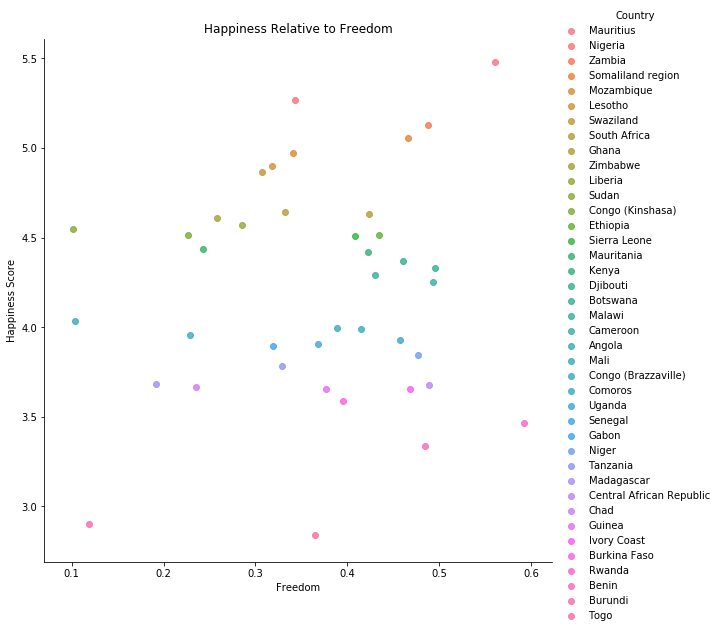

In [269]:
SSA_FREEDOM = sns.lmplot(data=ssafrica, x='Freedom', y='Happiness Score', fit_reg=False, hue='Country',size=8)
plt.title('Happiness Relative to Freedom')

From the analysis, there is zero correlation between Freedom levels and Happiness among countries in Sub Saharan Africa.

Text(0.5, 1, 'Happiness Relative to Trust in Government')

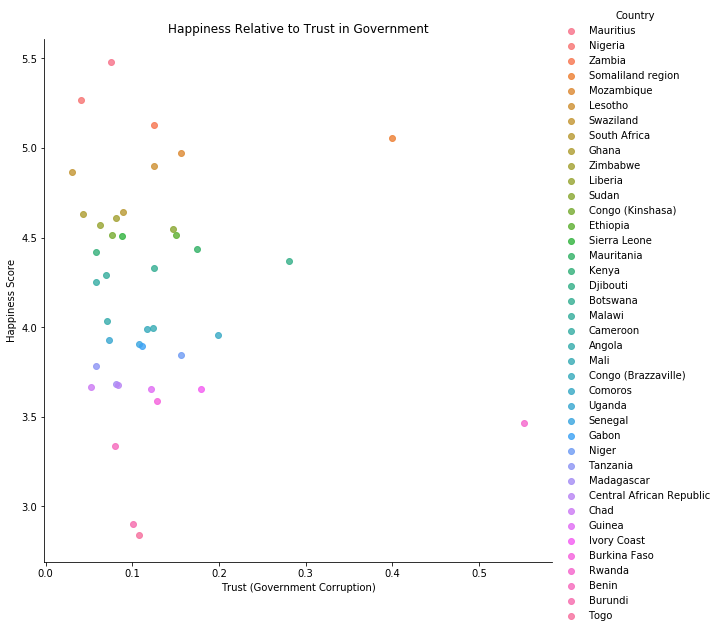

In [270]:
SSA_TRUST = sns.lmplot(data=ssafrica, x='Trust (Government Corruption)', y='Happiness Score', fit_reg=False, hue='Country', size=8)
plt.title('Happiness Relative to Trust in Government')

From the analysis, the correlation between Trust levels and Happiness among countries in Sub Saharan Africa is indeterminate. Most Sub saharan african countries have low trust in government, indicative of high corruption levels but have varying happiness scores regardless of similarly low trust scores.

In [284]:
ssa_corr = pd.DataFrame(ssafrica, columns=['Happiness Score','Economy (GDP per Capita)', 'Family', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'])
print(ssa_countries)

     Happiness Score  Economy (GDP per Capita)   Family  Freedom  \
70             5.477                   1.00761  0.98521  0.56066   
77             5.268                   0.65435  0.90432  0.34334   
84             5.129                   0.47038  0.91612  0.48827   
90             5.057                   0.18847  0.95152  0.46582   
93             4.971                   0.08308  1.02626  0.34037   
96             4.898                   0.37545  1.04103  0.31767   
100            4.867                   0.71206  1.07284  0.30658   
112            4.642                   0.92049  1.18468  0.33207   
113            4.633                   0.54558  0.67954  0.42342   
114            4.610                   0.27100  1.03276  0.25861   
115            4.571                   0.07120  0.78968  0.28531   
117            4.550                   0.52107  1.01404  0.10081   
119            4.517                   0.00000  1.00120  0.22605   
121            4.512                   0.19073  

In [285]:
ssacorr = ssa_corr.corr(method='pearson')
print(ssacorr)

                               Happiness Score  Economy (GDP per Capita)  \
Happiness Score                       1.000000                  0.345474   
Economy (GDP per Capita)              0.345474                  1.000000   
Family                                0.576974                  0.407151   
Freedom                               0.101302                  0.059904   
Trust (Government Corruption)        -0.077852                 -0.156357   
Generosity                            0.289921                 -0.359302   
Dystopia Residual                     0.582922                 -0.293800   

                                 Family   Freedom  \
Happiness Score                0.576974  0.101302   
Economy (GDP per Capita)       0.407151  0.059904   
Family                         1.000000 -0.108950   
Freedom                       -0.108950  1.000000   
Trust (Government Corruption) -0.018727  0.317631   
Generosity                     0.017707  0.282850   
Dystopia Residual   

Text(0.5, 1, 'Correlation Between Variables Influencing Happiness in Sub Saharan Africa')

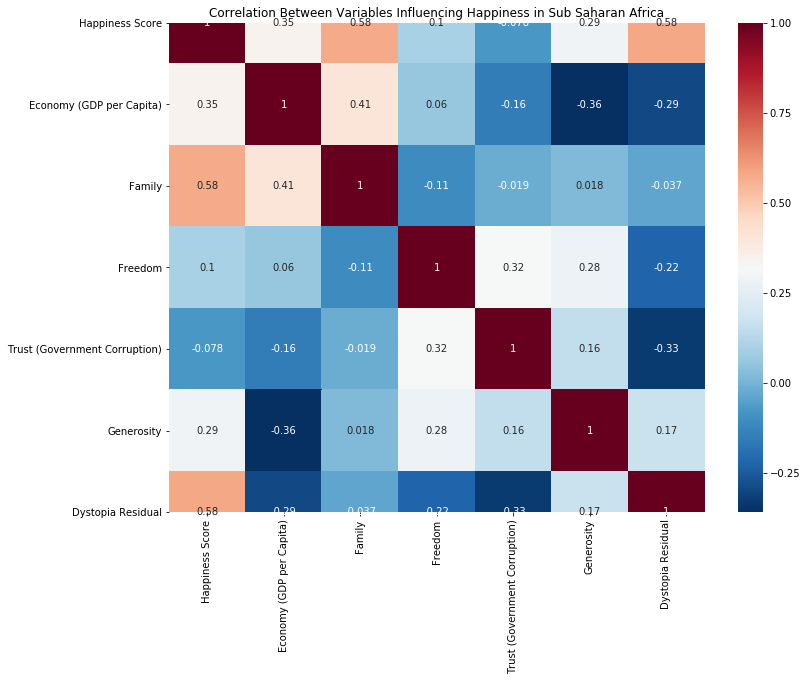

In [287]:
plt.subplots(figsize=(12, 9))
sns.heatmap(ssacorr,xticklabels=ssacorr.columns,yticklabels=ssacorr.columns, cmap='RdBu_r',annot=True,linewidth=0)
plt.title('Correlation Between Variables Influencing Happiness in Sub Saharan Africa')

The heatmap is an illustration of correlations between variables affecting the overall happiness score in Sub Saharan Africa. The heatmap illustrates a positive correlation between GDP per capita and Happiness Score, Generosity and Happiness Score & Family and Happiness Score. There is a negative corelation between Trust/Government Corruption levels and Happiness Score.